## This is a sample jupyter notebook to generate the prediction for competition submission

### Download and import custom module from RCI repo to get latest dataset from IPFS

In [2]:
# download custom module from RCI github repo which enable us to download dataset directly from IPFS
!wget -O dataloader.py https://raw.githubusercontent.com/rocketcapital-ai/competition_quickstart_dataloader/main/dataloader.py

# import modules
import sys, zipfile
from google.colab import files

# append the directory of downloaded custom module to system path so we can import it
sys.path.append('/content/')

# install base58 module to decrpt the dataset
!pip install base58

# import the downloaded module
from dataloader import download_dataset

# download latest dataset from IPFS
filename = download_dataset()

# unzip the file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

--2021-08-05 10:53:51--  https://raw.githubusercontent.com/rocketcapital-ai/competition_quickstart_dataloader/main/dataloader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2786 (2.7K) [text/plain]
Saving to: ‘dataloader.py’

dataloader.py       100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-08-05 10:53:51 (53.0 MB/s) - ‘dataloader.py’ saved [2786/2786]

Retrieving dataset for challenge 4..
Dataset saved to challenge_4_dataset.zip


### Loading train_dataset and validation_dataset

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

train_dataset  = pd.read_csv('/content/dataset/train_dataset.csv', index_col = 'date')
validation_dataset  = pd.read_csv('/content/dataset/validation_dataset.csv', index_col = 'date')


In [4]:
# first column (symbol) is the ticker
# 'target_DC1' is the log of return for delta between current close to previous close
# 'target' is the y which is ranked by Era using 'target_DC1'
# the rest of the columns are features to be used for ML
train_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1,target,target_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,TRST,0.214286,0.142857,0.321429,0.392857,0.375000,0.214286,0.285714,0.428571,0.321429,...,0.392857,0.678571,0.785714,0.785714,0.714286,0.750000,0.785714,0.714286,0.000000,-0.186365
2018-04-29,DLT,0.285714,0.250000,0.107143,0.321429,0.214286,0.500000,0.357143,0.678571,0.535714,...,0.178571,0.250000,0.250000,0.357143,0.214286,0.285714,0.357143,0.285714,0.500000,-0.005240
2018-04-29,VGX,0.785714,0.750000,0.500000,0.482143,0.571429,0.678571,0.142857,0.392857,0.714286,...,0.357143,0.392857,0.607143,0.678571,0.392857,0.714286,0.714286,0.535714,0.107143,-0.147385
2018-04-29,OMG,0.750000,0.964286,0.892857,0.964286,0.964286,0.964286,0.071429,0.321429,0.857143,...,0.750000,0.928571,0.928571,0.892857,0.928571,0.892857,0.892857,0.821429,0.285714,-0.066945
2018-04-29,UFR,0.607143,0.392857,0.250000,0.428571,0.500000,0.339286,0.750000,0.607143,0.750000,...,0.107143,0.535714,0.321429,0.214286,0.607143,0.142857,0.142857,0.178571,0.714286,0.020286


In [5]:
# validation_dataset is the latest data from most recent Era
# it has the same structure as the dataset, however 'target' and 'target_DC1' are NaN
# contributor should only predict the 'target' only
# note that the 'target_DC1' will be only used for verification and to reconstruct the 'target' whenever needed
validation_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1,target,target_DC1
date,,,,,,,,,,,,,,,,,,,,,
2021-09-26,TRST,0.488,0.503,0.505,0.443,0.538,0.514,0.548,0.571,0.509,...,0.192,0.170,0.122,0.128,0.142,0.234,0.240,0.216,NaN,NaN
2021-09-26,SALT,0.059,0.336,0.123,0.112,0.111,0.093,0.152,0.171,0.228,...,0.444,0.512,0.536,0.526,0.542,0.516,0.490,0.510,NaN,NaN
2021-09-26,PAY,0.526,0.673,0.598,0.616,0.733,0.700,0.651,0.256,0.668,...,0.278,0.256,0.256,0.296,0.228,0.246,0.278,0.214,NaN,NaN
2021-09-26,PRE,0.488,0.503,0.338,0.497,0.569,0.552,0.548,0.571,0.557,...,0.990,0.978,0.992,0.992,0.990,0.994,0.994,0.992,NaN,NaN
2021-09-26,BTC,0.002,0.000,0.000,0.000,0.992,0.000,0.000,0.000,0.000,...,0.480,0.352,0.464,0.500,0.410,0.682,0.712,0.640,NaN,NaN


### Create X and y from train_dataset

In [6]:
# X is all the columns except the 'symbol', 'target', 'target_DC1'
X = train_dataset.iloc[:, 1:-2]

# y is just the target
y = train_dataset.target

In [7]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_2001,feature_2002,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,0.214286,0.142857,0.321429,0.392857,0.375000,0.214286,0.285714,0.428571,0.321429,0.607143,...,0.642857,0.714286,0.392857,0.678571,0.785714,0.785714,0.714286,0.750000,0.785714,0.714286
2018-04-29,0.285714,0.250000,0.107143,0.321429,0.214286,0.500000,0.357143,0.678571,0.535714,0.678571,...,0.214286,0.285714,0.178571,0.250000,0.250000,0.357143,0.214286,0.285714,0.357143,0.285714
2018-04-29,0.785714,0.750000,0.500000,0.482143,0.571429,0.678571,0.142857,0.392857,0.714286,0.714286,...,0.392857,0.571429,0.357143,0.392857,0.607143,0.678571,0.392857,0.714286,0.714286,0.535714
2018-04-29,0.750000,0.964286,0.892857,0.964286,0.964286,0.964286,0.071429,0.321429,0.857143,0.464286,...,0.821429,0.821429,0.750000,0.928571,0.928571,0.892857,0.928571,0.892857,0.892857,0.821429
2018-04-29,0.607143,0.392857,0.250000,0.428571,0.500000,0.339286,0.750000,0.607143,0.750000,0.571429,...,0.071429,0.071429,0.107143,0.535714,0.321429,0.214286,0.607143,0.142857,0.142857,0.178571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-19,0.367617,0.508147,0.504073,0.642566,0.447047,0.557026,0.585540,0.542770,0.520367,0.575356,...,0.372709,0.372709,0.374745,0.782077,0.798371,0.794297,0.792261,0.313646,0.299389,0.338086
2021-09-19,0.525458,0.508147,0.504073,0.642566,0.580448,0.557026,0.585540,0.542770,0.520367,0.575356,...,0.763747,0.771894,0.737271,0.747454,0.786151,0.796334,0.763747,0.773931,0.771894,0.745418
2021-09-19,0.525458,0.508147,0.504073,0.642566,0.580448,0.557026,0.585540,0.412424,0.520367,0.575356,...,0.936864,0.647658,0.995927,0.995927,0.896130,0.566191,0.995927,0.004073,0.002037,0.164969


In [8]:
y

date
2018-04-29    0.000000
2018-04-29    0.500000
2018-04-29    0.107143
2018-04-29    0.285714
2018-04-29    0.714286
                ...   
2021-09-19    0.024440
2021-09-19    0.566191
2021-09-19    0.995927
2021-09-19    0.468432
2021-09-19    0.672098
Name: target, Length: 57982, dtype: float64

### Each era representing a set of cryptocurrency assets for the time period, the number of assets within each Era is different

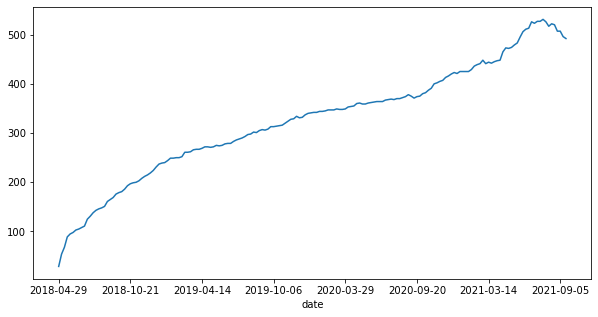

In [9]:
X.groupby(X.index).count().iloc[:,0].plot(figsize = (10,5));

### Split X, y into train and test

In [10]:
train = 0.9
test = 0.1
era = len(X.index.unique())
train_era = int(era * train)
test_era = era - train_era
print('total Era: {}'.format(era))
print('train Era: {}'.format(train_era))
print('test Era: {}'.format(test_era))


total Era: 178
train Era: 160
test Era: 18


In [11]:
#split train and test set according to the train_era and test_era
X_train = X[X.index < X.index.unique()[train_era]]
y_train = y[y.index < y.index.unique()[train_era]]
X_test = X[X.index >= X.index.unique()[train_era]]
y_test = y[y.index >= y.index.unique()[train_era]]
print(X_train.shape)
print(X_test.shape)

(48753, 2010)
(9229, 2010)


### Use simple Linear Regression to train a model and check the rmse

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)

In [13]:
# Define error metrics
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

y_pred_train = reg.predict(X_train)
print('rmse for train dataset: {}'.format(rmse(y_train,y_pred_train)))

y_pred_test = reg.predict(X_test)
print('rmse for test dataset: {}'.format(rmse(y_test,y_pred_test)))


rmse for train dataset: 0.2787059615092172
rmse for test dataset: 0.29656652887354573


In [14]:
# Use the trained Linear Regression model to make prediction on latest data

X_validation = validation_dataset.iloc[:, 1:-2]
y_validation_linear_reg = reg.predict(X_validation)

y_validation_linear_reg

array([ 0.17332653,  0.16257041,  0.45011969,  0.63032901,  0.97544373,
        0.97549382,  0.05507549,  0.31464516,  0.37890503,  0.46905651,
        0.37855132,  0.88951789,  1.26705963,  0.67111569,  0.31168002,
        1.43742423,  0.41114202,  0.48418822,  0.47862624,  1.2447928 ,
       -0.07861526,  0.8896493 ,  0.51957398,  1.07191696,  0.75246139,
        0.12444854,  0.91323787,  1.00363206,  0.72184549,  0.6063673 ,
        0.65059386,  0.46140226,  0.75812689,  0.49913366,  0.74156221,
        0.44863317,  0.2612911 ,  0.47163059, -0.05409225,  0.39617708,
        0.48027033,  0.56713969,  0.52185789,  0.42506331,  1.43229974,
        0.08640837, -0.06119774,  0.55652896,  0.36878366,  0.07882429,
        0.11215385,  0.66370573,  1.63734346,  0.36529738,  0.57393924,
        0.37375394,  0.54425547,  0.72652462,  0.49456551, -0.59992586,
        0.57805707,  0.6080606 ,  0.27445304, -0.08394991,  0.49780673,
        0.45028128,  0.41834079,  0.26205507,  0.42691251,  1.08

### Let's use the prediction from linear regression to join with validation dataset symbol for submission

In [15]:
prediction = pd.DataFrame()
prediction['symbol'] = list(validation_dataset.symbol)
prediction['prediction'] = y_validation_linear_reg
prediction.head()

,symbol,prediction
0,TRST,0.173327
1,SALT,0.162570
2,PAY,0.450120
3,PRE,0.630329
4,BTC,0.975444


### Check is prediction dataframe in accordance for submission format (using the prediction from linear regression)

In [16]:
#check if y_latest is in accordance to shape for submission
if set(prediction.symbol) == set(validation_dataset.symbol):
    print('symbol matched!')
else:
    print('symbol unmatched, the symbol in prediction df must match the symbol in validation_dataset...')
    
if prediction.shape[1] == 2:
    print('column counts ok!')
else:
    print('It should have 2 columns, first column with symbol, second with prediction...')


symbol matched!
column counts ok!


### Output prediction as a .csv file for submission!

In [17]:
#Output submission as .csv file
#The prediction.csv is stored in content/prediction folder
import os
if not os.path.exists('/content/prediction'):
    os.makedirs('/content/prediction')
prediction.to_csv('/content/prediction/prediction.csv', index = False, header = None)